In [11]:
library(dynlm)
library(car)
library(carData)
library(zoo)
library(xts)
library(tsbox)
library(tseries)
library(forecast)
library(astsa)
library(gvlma)
library(hwwntest)

In [31]:
# Making an xts object for the data
# Mumbai

mumbai <- as.data.frame(read.csv("../../Data/DistTimeSeries/Cases/Ahmedabad.csv", sep = ","))
mumbai$ï..Date <- as.Date(mumbai$ï..Date , format = "%d-%m-%Y")
colnames(mumbai) <- c("Date", "NewCases", "TotalCases", "Lockdown", "Temperature", "RH")
mumbai.xts <- xts(mumbai, order.by=mumbai$Date)
mumbai.xts <- mumbai.xts[, colnames(mumbai.xts) != "Date"]
head(mumbai)

Date,NewCases,TotalCases,Lockdown,Temperature,RH
2020-01-30,0,0,0,23,32
2020-01-31,0,0,0,23,31
2020-02-01,0,0,0,22,24
2020-02-02,0,0,0,22,27
2020-02-03,0,0,0,25,27
2020-02-04,0,0,0,23,29


In [38]:
# We make date with zero cases to 1 case
mumbai.xts$NewCases <- replace(mumbai.xts$NewCases, (as.numeric(mumbai.xts$NewCases) == 0), "1")

# Making new dataset after 20-Mar
startDate <- as.Date("25-Mar-20" , format = "%d-%b-%y")
endDate <- as.Date("27-Apr-20" , format = "%d-%b-%y")

newMumbai.xts <- subset(mumbai.xts, index(mumbai.xts)>=startDate)
newMumbai.xts <- subset(newMumbai.xts, index(newMumbai.xts)<=endDate)

# mumbai.xts$NewCases

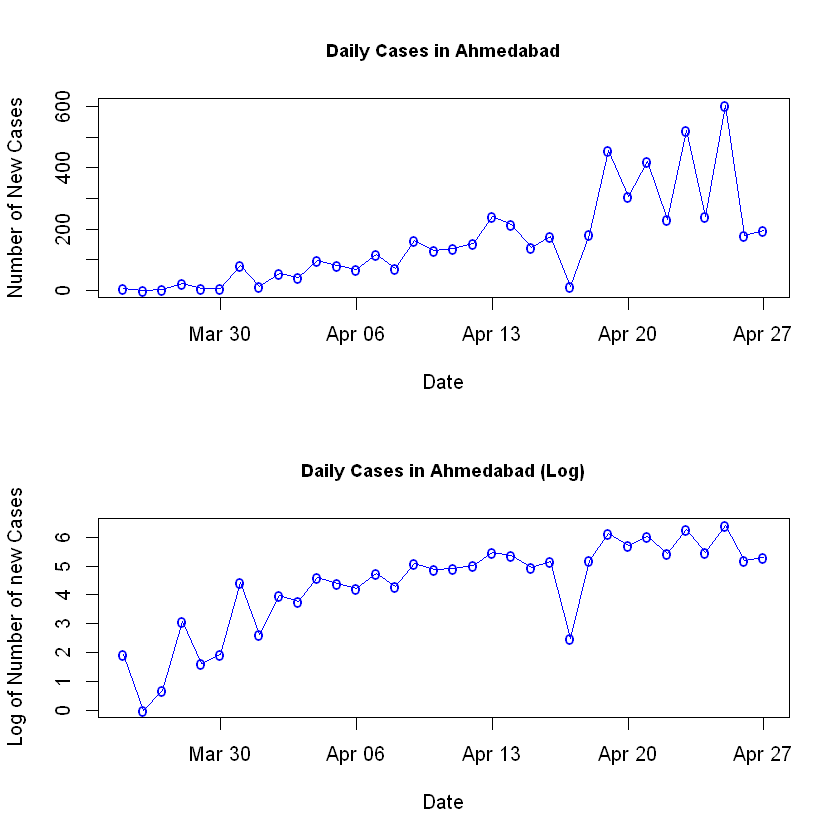

In [39]:
# Plots for Daily new Cases

par(mfrow = c(2,1), cex.main=0.9) # set up the graphics
plot(index(newMumbai.xts), newMumbai.xts$NewCases, type="o", col="blue", pch="o", lty=1, main="Daily Cases in Ahmedabad", ylab="Number of New Cases", xlab="Date")
plot(index(newMumbai.xts), log(as.numeric(newMumbai.xts$NewCases)), type="o", col="blue", pch="o", lty=1, main="Daily Cases in Ahmedabad (Log)", ylab="Log of Number of new Cases", xlab="Date")

# par(mfrow = c(2,1))
# acf(log(as.numeric(newMumbai.xts$NewCases)), main="Autocorrelation for log of number of Confirmed Cases (Daily new)")
# # ccf(log(as.numeric(newMumbai.xts$NewCases)), as.numeric(newMumbai.xts$Lockdown), main="Cross Correlation between log of new Confirmed Cases(t+lag) and Lockdown(t)")

# par(mfrow = c(2,1), cex.main=0.9)
# ccf(log(as.numeric(newMumbai.xts$NewCases)), as.numeric(newMumbai.xts$Temperature), main="Cross Correlation between log of new Confirmed Cases(t+lag) and Temperature(t)")
# ccf(log(as.numeric(newMumbai.xts$NewCases)), as.numeric(newMumbai.xts$RH), main="Cross Correlation between log of new Confirmed Cases(t+lag) and Relative Humidity(t)")


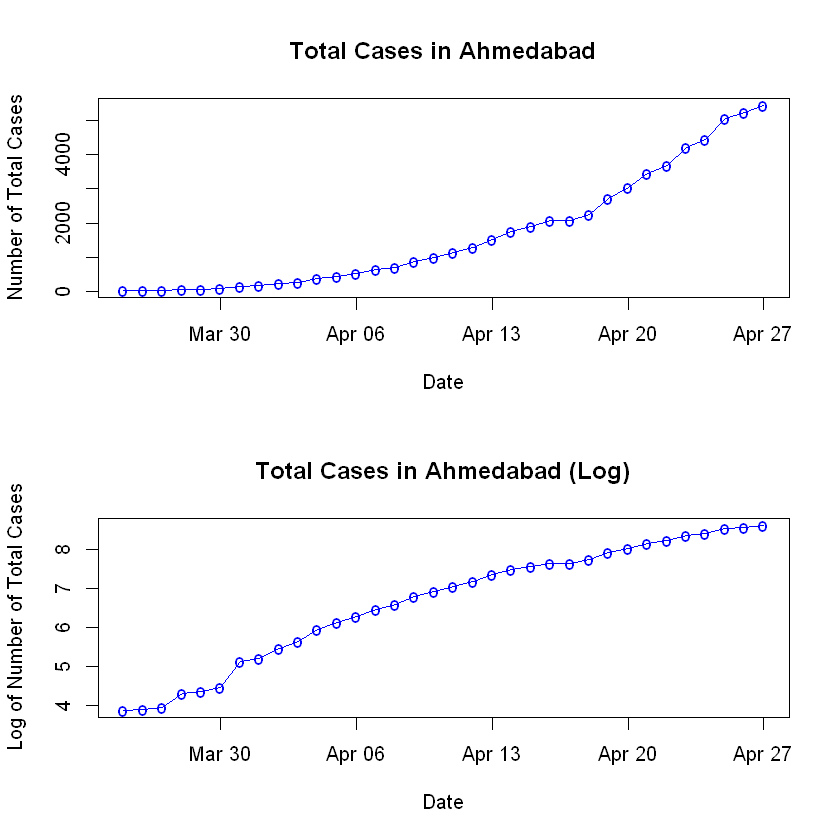

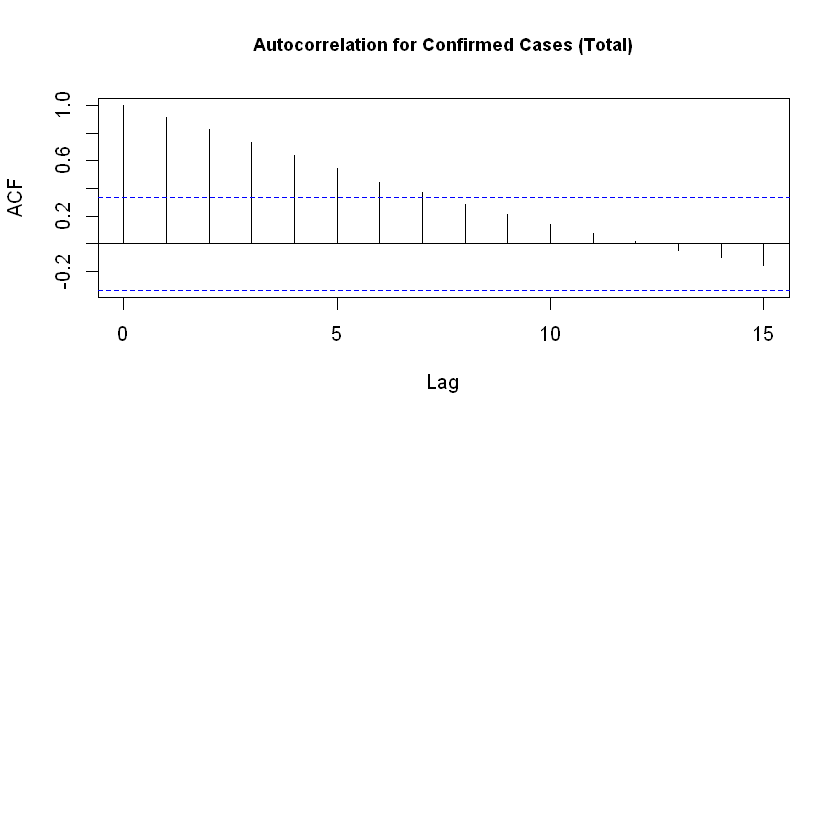

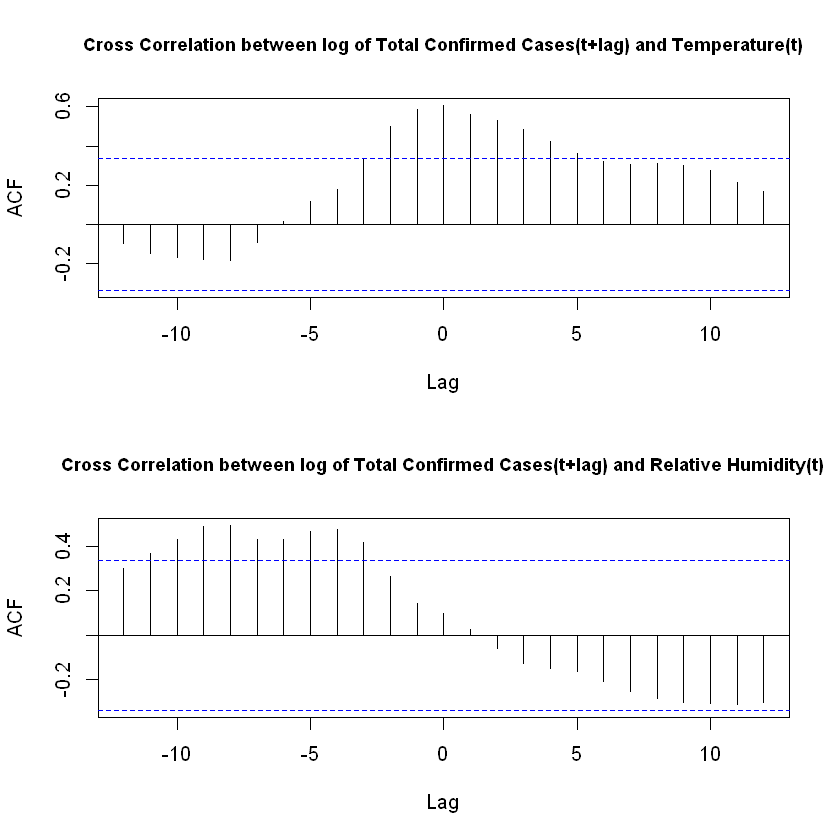

In [40]:
# Plots for Total Cases

par(mfrow = c(2,1)) # set up the graphics
plot(index(newMumbai.xts), newMumbai.xts$TotalCases, type="o", col="blue", pch="o", lty=1, main="Total Cases in Ahmedabad", ylab="Number of Total Cases", xlab="Date")
plot(index(newMumbai.xts), log(as.numeric(newMumbai.xts$TotalCases)), type="o", col="blue", pch="o", lty=1, main="Total Cases in Ahmedabad (Log)", ylab="Log of Number of Total Cases", xlab="Date")

par(mfrow = c(2,1), cex.main=0.9)
acf(log(as.numeric(newMumbai.xts$TotalCases)), main="Autocorrelation for Confirmed Cases (Total)")
# ccf(log(as.numeric(newMumbai.xts$TotalCases)), as.numeric(newMumbai.xts$Lockdown), main="Cross Correlation between log of Total Confirmed Cases(t+lag) and Lockdown(t)")

par(mfrow = c(2,1), cex.main=0.9)
ccf(log(as.numeric(newMumbai.xts$TotalCases)), as.numeric(newMumbai.xts$Temperature), cex=0.25, main="Cross Correlation between log of Total Confirmed Cases(t+lag) and Temperature(t)")
ccf(log(as.numeric(newMumbai.xts$TotalCases)), as.numeric(newMumbai.xts$RH), main="Cross Correlation between log of Total Confirmed Cases(t+lag) and Relative Humidity(t)")

In [41]:
# Making time squared trend to be fit
# Adding plus 1 kyunki baadme vo subtract ho jaayega
timeTrend_2 <- (1:length(index(newMumbai.xts))) ^2  
timeTrend <- (1:length(index(newMumbai.xts)))

mumbai.reg.data <- data.frame(log(as.numeric(coredata(newMumbai.xts$NewCases))),
                              as.numeric(coredata(newMumbai.xts$Temperature)), as.numeric(coredata(newMumbai.xts$RH)),   
                              timeTrend, timeTrend_2)
colnames(mumbai.reg.data) <- c("TimeSeries", "Temperature", "RH", "timeTrend", "timeTrend_2")

# mumbai.reg.data.matrix <- data.matrix(mumbai.reg.data)
# mumbai.reg.data.xts <- xts(mumbai.reg.data, order.by=index(newMumbai.xts))
mumbai.reg.data.ts <- as.ts(mumbai.reg.data, order.by=index(newMumbai.xts))
# index(mumbai.reg.data.zoo)
mumbai.reg.data.ts 

TimeSeries,Temperature,RH,timeTrend,timeTrend_2
1.9459101,33,27,1,1
0.0000000,31,40,2,4
0.6931472,28,42,3,9
3.0910425,29,28,4,16
1.6094379,33,19,5,25
1.9459101,32,15,6,36
4.4188406,31,20,7,49
2.6390573,32,31,8,64
3.9889840,36,22,9,81
3.7612001,36,13,10,100


## Let's de trend the total Cases Data



Time series regression with "ts" data:
Start = 1, End = 34

Call:
dynlm(formula = TimeSeries ~ timeTrend + timeTrend_2 + Temperature + 
    RH, data = mumbai.reg.data.ts)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.78316 -0.19735 -0.00716  0.55229  1.12546 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  6.060256   3.666663   1.653   0.1092   
timeTrend    0.269648   0.081065   3.326   0.0024 **
timeTrend_2 -0.003286   0.002360  -1.392   0.1744   
Temperature -0.105791   0.096183  -1.100   0.2804   
RH          -0.060694   0.031774  -1.910   0.0660 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8112 on 29 degrees of freedom
Multiple R-squared:  0.777,	Adjusted R-squared:  0.7463 
F-statistic: 25.27 on 4 and 29 DF,  p-value: 4.349e-09


[1] 88.85241

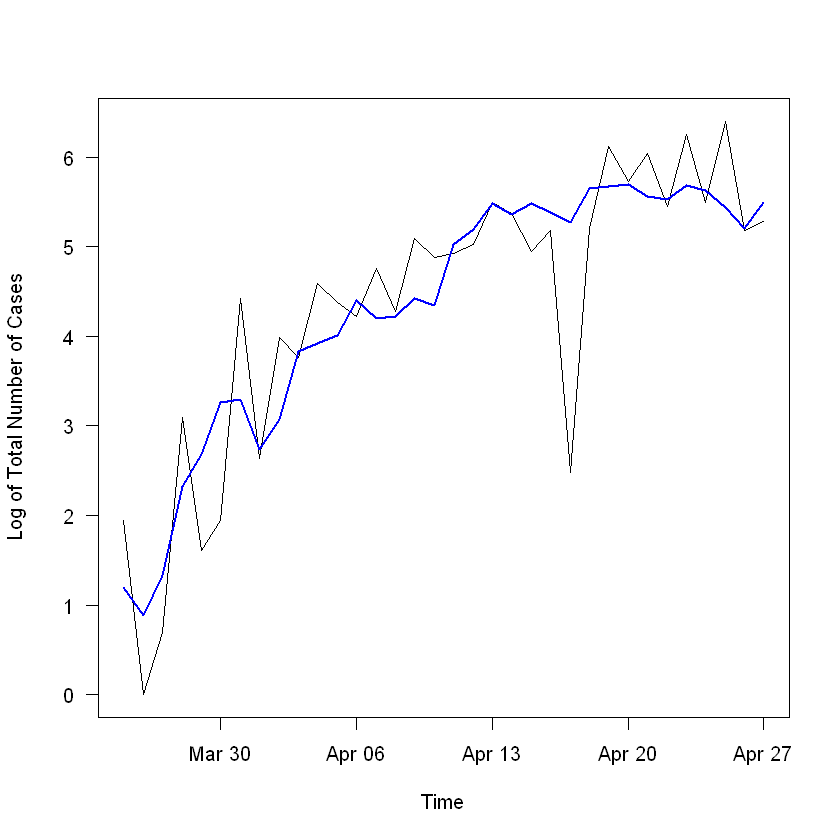

In [42]:
dataTimeSeries <- log(as.numeric(newMumbai.xts$NewCases))
numRows <- length(dataTimeSeries)
start = 1
detrended <- dynlm(TimeSeries ~ timeTrend+timeTrend_2+Temperature+RH, data=mumbai.reg.data.ts)
summary(detrended)
prediction <- predict(detrended)
plot(index(newMumbai.xts)[start:numRows], dataTimeSeries[start:numRows], "l", las=1, xlab="Time", ylab="Log of Total Number of Cases")
lines(prediction~index(newMumbai.xts)[start:numRows], col="blue", lwd=2)
# plot(residuals(detrended))
# shapiro.test(detrended$residuals)
AIC(detrended)

In [43]:
# Forecasting
# Predicting for 26th, 27th and 28th
time <- c(35)
timeSquared <- time*time

# For 25th, 26th and 27th
temperature <- c(36)
RelHum <- c(35)
data <- data.frame(temperature, RelHum, time, timeSquared)
colnames(data) <- c("Temperature", "RH", "timeTrend", "timeTrend_2")
data
pred <- predict(detrended, newdata = data)
varianceError <- var(detrended$residuals)
varianceError <- varianceError/2
varianceError
exp(pred)
pred <- pred+varianceError
finalPred <- exp(pred)
finalPred
initial <- exp(dataTimeSeries[32])
initial

Temperature,RH,timeTrend,timeTrend_2
36,35,35,1225


[1] 0.289151

1 
254.5831

1 
339.9432

[1] 602

In [44]:
# par(mfrow = c(2,1))
# acf(detrended$residuals, main="Autocorrelation between residuals")
# pacf(detrended$residuals, main="Partial autocorrelation between residuals")

In [45]:
# Test for white noise
bartlettB.test(detrended$residuals)


	Bartlett B Test for white noise

data:  
= 0.365, p-value = 0.9993
